# 데이터 분석 프로그래밍 Pandas Basic

# 1. 시리즈와 데이터프레임

### 시리즈 
인덱스와 쌍으로 이루어진 데이터

In [1]:
#라이브러리 불러오기
import pandas as pd
sd1 = pd.Series(['Dog','Cat','Tiger','Lion','Monkey'],index=['0','1', '2','3','4'] )

#시리즈데이터 출력
sd1

0       Dog
1       Cat
2     Tiger
3      Lion
4    Monkey
dtype: object

#### 1) 딕셔너리를 이용해 만들기
key가 인덱스, value는 열 데이터로 처리됨

In [ ]:
#딕셔너리로 Series 생성
dict_data = {'a':1,'b':2,'c':3}
sd2 = pd.Series(dict_data)
print(sd2) #시리즈데이터 출력

#타입 확인
type(sd2)

#### 2) 리스트를 이용해 만들기
list는 키 값이 없는 순서 자료형, 인덱스를 지정하지 않으면 자동으로 0부터 지정됨

In [ ]:
import pandas as pd

#리스트로 Series 생성
list_data = ['Dog','Cat','Tiger','Lion','Monkey']
sd3 = pd.Series(list_data) 
print(sd3)

sd3 = pd.Series(list_data,index=['A','B', 'C','D','E']) 
#데이터 확인
print(sd3)

#### 3) 튜플을 이용해 만들기
index도 튜플로 지정 가능

In [ ]:
import pandas as pd
#튜플로 Series 생성
tup_data = ('이순신','1991-03-15','남')
sd4 = pd.Series(tup_data, index = ('이름','생년월일','성별'))

#데이터 확인
sd4

### 데이터프레임
엑셀 스프레드시트 형태인 행과 열 자료구조. 여러 개의 Series가 합쳐진 구조
Pandas 기본 구조로 데이터 분석 시 가장 많이 사용하는 구조임.

#### 1) 딕셔너리를 이용해 만들기
Dict Key에 의해 column이 추가되는 형태

In [1]:
#라이브러리 불러오기
import pandas as pd

#딕셔너리로로 데이터프레임 생성
dict_data = {'동물':['Dog','Cat','Tiger','Lion','Monkey'],'나이':[7,9,2,3,1]}
df1 = pd.DataFrame(dict_data)

#타입 확인
print(type(df1))

#데이터 확인
print(df1)

<class 'pandas.core.frame.DataFrame'>
       동물  나이
0     Dog   7
1     Cat   9
2   Tiger   2
3    Lion   3
4  Monkey   1


#### 2) 리스트를 이용해 만들기
list in list에 의해 row값이 추가되는 형태

In [2]:
#라이브러리 불러오기
import pandas as pd

#리스트로 데이터프레임 생성
df2 = pd.DataFrame([['Dog','7'], ['Cat','9'], ['Tiger','2'], ['Lion','3'],['Monkey','1']],    # 행 데이터 pair
                  index = ['0','1','2','3','4'],                                              # index 지정 가능
                  columns = ['동물','나이'])                                                  # dict의 key에 해당

#타입 확인
print(type(df2))
#데이터 확인
print(df2)

<class 'pandas.core.frame.DataFrame'>
       동물 나이
0     Dog  7
1     Cat  9
2   Tiger  2
3    Lion  3
4  Monkey  1


# 2. 데이터프레임 기초 가공 / 기초 전처리
주어진 데이터를 바로 사용하기보다는 원하는 형태로 변형하는 경우가 대부분임.
데이터/형태를 가공하는 과정이 data preprocessing(전처리) / data manipulation(조작?).
필요한 데이터만 가져오기



###  데이터 요약 보기

In [4]:
# 관련 라이브러리 불러오기
import pandas as pd           #판다스
import seaborn as sns          #시본 

#데이터 준비 시본에 내장된 팁 데이터 
tips = sns.load_dataset("tips")    # 팁 데이터
print(tips.dtypes)
print(tips)


total_bill     float64
tip            float64
sex           category
smoker        category
day           category
time          category
size             int64
dtype: object
     total_bill   tip     sex smoker   day    time  size
0         16.99  1.01  Female     No   Sun  Dinner     2
1         10.34  1.66    Male     No   Sun  Dinner     3
2         21.01  3.50    Male     No   Sun  Dinner     3
3         23.68  3.31    Male     No   Sun  Dinner     2
4         24.59  3.61  Female     No   Sun  Dinner     4
..          ...   ...     ...    ...   ...     ...   ...
239       29.03  5.92    Male     No   Sat  Dinner     3
240       27.18  2.00  Female    Yes   Sat  Dinner     2
241       22.67  2.00    Male    Yes   Sat  Dinner     2
242       17.82  1.75    Male     No   Sat  Dinner     2
243       18.78  3.00  Female     No  Thur  Dinner     2

[244 rows x 7 columns]


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


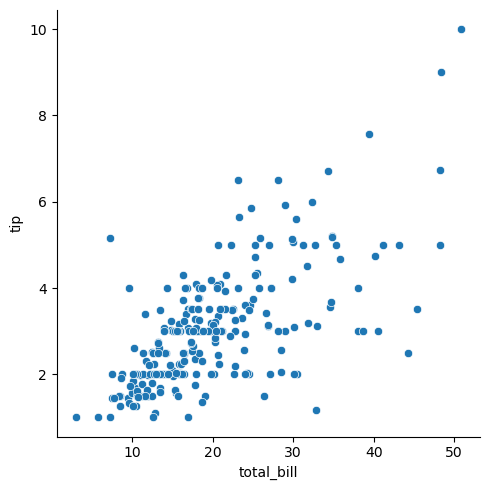

In [5]:
tips.info()
sns.relplot(x="total_bill", y="tip", data=tips)

### 행 상하위 데이터 추출

In [6]:
#데이터프레임에서 행의 상위 5개(default) 데이터 추출
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [7]:
#데이터프레임에서 행의 상위 10개 데이터 추출
tips.head(10)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
5,25.29,4.71,Male,No,Sun,Dinner,4
6,8.77,2.00,Male,No,Sun,Dinner,2
7,26.88,3.12,Male,No,Sun,Dinner,4
8,15.04,1.96,Male,No,Sun,Dinner,2
9,14.78,3.23,Male,No,Sun,Dinner,2


In [8]:
#데이터프레임에서 열의 하위 데이터 추출 
tips.tail()

,total_bill,tip,sex,smoker,day,time,size
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2
243,18.78,3.00,Female,No,Thur,Dinner,2


In [9]:
#데이터프레임에서 행의 하위 3개 데이터 추출
tips.tail(12)

,total_bill,tip,sex,smoker,day,time,size
232,11.61,3.39,Male,No,Sat,Dinner,2
233,10.77,1.47,Male,No,Sat,Dinner,2
234,15.53,3.00,Male,Yes,Sat,Dinner,2
235,10.07,1.25,Male,No,Sat,Dinner,2
236,12.60,1.00,Male,Yes,Sat,Dinner,2
237,32.83,1.17,Male,Yes,Sat,Dinner,2
238,35.83,4.67,Female,No,Sat,Dinner,3
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2


### 행 데이터만 추출하기

#### loc와 iloc 인덱스와 행번호란?
#### loc : 인덱스 기준으로 행 데이터 읽기
#### iloc : 행 번호를 기준으로 행 데이터 읽기

In [10]:
# 2번 인덱스를 삭제하고 새로운 데이터프레임 tips1 생성
#drop안에 삭제할 인덱스 list 명시
tips1 = tips.drop([2, 3, 7]) 
tips1.head(10)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
4,24.59,3.61,Female,No,Sun,Dinner,4
5,25.29,4.71,Male,No,Sun,Dinner,4
6,8.77,2.00,Male,No,Sun,Dinner,2
8,15.04,1.96,Male,No,Sun,Dinner,2
9,14.78,3.23,Male,No,Sun,Dinner,2
10,10.27,1.71,Male,No,Sun,Dinner,2
11,35.26,5.00,Female,No,Sun,Dinner,4
12,15.42,1.57,Male,No,Sun,Dinner,2


In [11]:
tips1.iloc[2]

total_bill     24.59
tip             3.61
sex           Female
smoker            No
day              Sun
time          Dinner
size               4
Name: 4, dtype: object

In [12]:
# 이미 지워진 인덱스 2번을 삭제하여 오류 발생
tips1.loc[2]

KeyError: 2

In [ ]:
#데이터프레임의 기본 정보 확인 
tips.info()

#### 1) 인덱스 읽기

In [13]:
#데이터프레임에서 프레임에서 인덱스가 0인 데이터 추출 
tips.loc[0]

total_bill     16.99
tip             1.01
sex           Female
smoker            No
day              Sun
time          Dinner
size               2
Name: 0, dtype: object

In [14]:
#1, 3, 5 인덱스의 데이터를 한꺼번에 가져오기
tips.loc[4:20]

,total_bill,tip,sex,smoker,day,time,size
4,24.59,3.61,Female,No,Sun,Dinner,4
5,25.29,4.71,Male,No,Sun,Dinner,4
6,8.77,2.00,Male,No,Sun,Dinner,2
7,26.88,3.12,Male,No,Sun,Dinner,4
8,15.04,1.96,Male,No,Sun,Dinner,2
9,14.78,3.23,Male,No,Sun,Dinner,2
10,10.27,1.71,Male,No,Sun,Dinner,2
11,35.26,5.00,Female,No,Sun,Dinner,4
12,15.42,1.57,Male,No,Sun,Dinner,2
13,18.43,3.00,Male,No,Sun,Dinner,4


#### 2) 행번호 읽기

In [15]:
#데이터 프레임에서 0번째 행 데이터 추출
tips.iloc[0]

total_bill     16.99
tip             1.01
sex           Female
smoker            No
day              Sun
time          Dinner
size               2
Name: 0, dtype: object

In [16]:
 #-1을 사용하여 마지막 행 데이터를 추출한 예제
tips.iloc[-1]

total_bill     18.78
tip              3.0
sex           Female
smoker            No
day             Thur
time          Dinner
size               2
Name: 243, dtype: object

#### 3) 특정 행 범위 영역을 선택

In [17]:
# tips[0:3]라고 하면 0, 1, 2번째 행을 출력합니다. 데이터프레임의 첫 번째 행을 0번째 행이라고 가정하며 
# [0:3]이라고 입력했지만 3번째 행을 가져오지 않음에 유의하세요.
tips[0:3]

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3


In [18]:
tips.iloc[0:3]

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3


In [19]:
tips.loc[0:3]

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2


In [20]:
# 특정 column 지정해서 가져오기
tips.loc[0:3,['tip','day']]

,tip,day
0,1.01,Sun
1,1.66,Sun
2,3.50,Sun
3,3.31,Sun


In [21]:
tips.loc[0,['tip']]

tip    1.01
Name: 0, dtype: object

In [22]:
#특정 인덱스 값과 특정 컬럼에 있는 값 가져오기. 
 
#tips.at[0,'total_bill']
tips.at[0,'total_bill']

16.99

In [23]:
# 위치를 이용하여 선택하기: .iloc
tips.iloc[3]

total_bill     23.68
tip             3.31
sex             Male
smoker            No
day              Sun
time          Dinner
size               2
Name: 3, dtype: object

In [24]:
#인덱스 번호로 행뿐만 아니라 열도 선택할 수 있습니다. 

tips.iloc[3:5,0:2]      # slicing 범위 지정


,total_bill,tip
3,23.68,3.31
4,24.59,3.61


In [25]:
#행과 열의 인덱스를 리스트로 넘겨줄 수도 있습니다. 
tips.iloc[[1,2,4],[0,2]]  # 특정 원소 지정

,total_bill,sex
1,10.34,Male
2,21.01,Male
4,24.59,Female


In [26]:
# 명시적으로 행이나 열 선택 인자에 ‘:’ 슬라이스를 전달하면 전체 선택
tips.iloc[1:3,:]

,total_bill,tip,sex,smoker,day,time,size
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3


In [27]:
tips.iloc[:,1:3]

,tip,sex
0,1.01,Female
1,1.66,Male
2,3.50,Male
3,3.31,Male
4,3.61,Female
...,...,...
239,5.92,Male
240,2.00,Female
241,2.00,Male
242,1.75,Male


In [28]:
#값 하나를 선택하기 위해서는 특정 행과 열을 지정
tips.iloc[1,1]

1.66

In [29]:
tips.iat[1,1]

1.66

### 4) 조건을 이용하여 선택

In [30]:
# 조건은 컬럼 데이터를 조건식과 비교하여 데이터를 추출하는 데이터베이스 SQL과 유사합니다
# 전체 데이터중 팁이 5 달러 이상
tips[tips.tip > 5]            #tips.tip > 5 결과에 따라 TRUE / FALSE인 series 타입 return

,total_bill,tip,sex,smoker,day,time,size
23,39.42,7.58,Male,No,Sat,Dinner,4
44,30.40,5.60,Male,No,Sun,Dinner,4
47,32.40,6.00,Male,No,Sun,Dinner,4
52,34.81,5.20,Female,No,Sun,Dinner,4
59,48.27,6.73,Male,No,Sat,Dinner,4
85,34.83,5.17,Female,No,Thur,Lunch,4
88,24.71,5.85,Male,No,Thur,Lunch,2
116,29.93,5.07,Male,No,Sun,Dinner,4
141,34.30,6.70,Male,No,Thur,Lunch,6
155,29.85,5.14,Female,No,Sun,Dinner,5


In [31]:
# and 조건 – 남자 손님이면서 비흡연자
tips[(tips['day']=='Sun') & (tips['smoker']=='No')]

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
5,25.29,4.71,Male,No,Sun,Dinner,4
6,8.77,2.00,Male,No,Sun,Dinner,2
7,26.88,3.12,Male,No,Sun,Dinner,4
8,15.04,1.96,Male,No,Sun,Dinner,2
9,14.78,3.23,Male,No,Sun,Dinner,2


### 5) 특정 조건 선택

In [32]:
# 특정조건 선택시 ‘isin’ 함수를 많이 사용합니다. 
# 일요일 이면 True
[tips['day'].isin(['Sun'])]

[0       True
 1       True
 2       True
 3       True
 4       True
        ...  
 239    False
 240    False
 241    False
 242    False
 243    False
 Name: day, Length: 244, dtype: bool]

In [33]:
# 팁을 1달러 지불한 고객
tips[tips['tip'].isin([1])]

,total_bill,tip,sex,smoker,day,time,size
67,3.07,1.0,Female,Yes,Sat,Dinner,1
92,5.75,1.0,Female,Yes,Fri,Dinner,2
111,7.25,1.0,Female,No,Sat,Dinner,1
236,12.60,1.0,Male,Yes,Sat,Dinner,2


### 열 변수  

#### 1) 열변수 추출

In [34]:
#데이터프레임에서 tips과 손님수 가지고 오기 /  series 반환
tips.tip                    # 구조체 처럼 접근

0      1.01
1      1.66
2      3.50
3      3.31
4      3.61
       ... 
239    5.92
240    2.00
241    2.00
242    1.75
243    3.00
Name: tip, Length: 244, dtype: float64

In [35]:
tips['size']              # column 명으로 접근

0      2
1      3
2      3
3      2
4      4
      ..
239    3
240    2
241    2
242    2
243    2
Name: size, Length: 244, dtype: int64

#### 2) 여러 개 열 변수 한 번에 추출하기 

In [36]:
#데이터프레임 'total_bill ', 'tip', 'day' 열 변수 추출
tips [['total_bill','tip','day']]

,total_bill,tip,day
0,16.99,1.01,Sun
1,10.34,1.66,Sun
2,21.01,3.50,Sun
3,23.68,3.31,Sun
4,24.59,3.61,Sun
...,...,...,...
239,29.03,5.92,Sat
240,27.18,2.00,Sat
241,22.67,2.00,Sat
242,17.82,1.75,Sat


#### 3) 파생변수(유도변수) 만들기
특정 목적을 위해 기존 변수에서 새로운 변수를 유도/생성

In [ ]:
# 금액과 팁의 합계인 총액 (total)파생변수 만들기
tips['total'] = tips['total_bill'] + tips['tip']
tips.info()



### 데이터조작

#### 1)데이터 개수확인

In [ ]:
#데이터프레임의 개수 확인 
tips.count( )

In [ ]:
len(tips)

#### 2) 기타 보기 

In [ ]:
# 데이터프레임 인덱스 보기
tips.index

In [ ]:
# 데이터프레임 컬럼 보기
tips.columns

In [ ]:
tips.columns.values

In [ ]:
# 행, 열 구조 보기 
tips.values

#### 3) 정렬 

In [ ]:
# 지급액'열(by=' total_bill ')을 기준으로 index(axis=0) 오름차순 정렬하기

sorted_tips = tips.sort_values(by=['total_bill'])    #defualt axis = 0 : 열방향  오름차준
sorted_tips

In [ ]:
# 지급액'열(by=' total_bill ')을 기준으로 index(axis=0) 내림차순 정렬하기 ascending=False 옵션 추가 
tips.sort_values(by=['total_bill'], axis=0, ascending=False)

In [ ]:
#열 이름을 (알파벳 순서로) 정렬하기 : axis=1
tips.sort_index(axis=1)   # (axis = 0) : 인덱스명 정렬(defualt),  (axis = 1) : 컬럼명 정렬

#### 4) 행/열 합계

In [ ]:
# 행 합계를 구할 때는 sum(axis=1) 메서드를 사용한다.
# warning이 발생하는데, 이는 숫자형 데이터 외 다른 데이터가 데이터 프레임에 포함되어 있기 때문에 주의의 주는 것임
# 파라미터에 numeric_only=True 입력하면 경고 없어짐
tips.sum(axis=1)

In [ ]:
# 열 합계를 구할 때는 sum(axis=0) 메서드를 사용하는데 axis인수의 디폴트 값이 0이므로 axis인수를 생략할 수 있다.
tips.sum(numeric_only=True)

## 4. 데이터 병합과 연결

### 데이터 연결
데이터의 행을 위, 아래 또는 좌우로 결합하는 방법

In [ ]:
import pandas as pd

# 시리즈를 데이터프레임의 새로운 행으로 연결하려면
s1 = pd.Series([0, 1], index=['A', 'B'])
s2 = pd.Series([2, 3, 4], index=['c', 'd', 'e'])
print(s1)
print(s2)
print(pd.concat([s1, s2]))

In [ ]:
#만약 옆으로 데이터 열을 연결하고 싶으면 axis=1로 인수를 설정한다.
df1 = pd.DataFrame([['Dog','3'], ['Bird','10'], ['Tiger','6'], ['Moose','3']],
                  index = ['0','1','2','3'],
                  columns = ['동물','나이'])
df1

In [ ]:
df2 = pd.DataFrame([['집','0'], ['초원','0'], ['수풀','0'], ['초원','1']],
                  index = ['0','1','2','3'],
                  columns = ['사는곳','뿔의 개수'])
df2

In [ ]:
print(pd.concat([df1, df2], axis=1))

# series 와 같이 axis=0이면 어떻게 될까?



### 데이터 병합
두 데이터프레임(테이블)의 공통  column을 기준으로 병합

In [ ]:
import pandas as pd

# 병합용 데이터프레임 생성
df1 = pd.DataFrame({ '고객번호': [1001, 1002, 1003, 1004, 1005, 1006, 1007],
    '이름': ['강감찬', '홍길동', '이순신', '장보고', '유관순', '신사임당', '세종대왕']
}, columns=['고객번호', '이름'])
df1

In [ ]:
df2 = pd.DataFrame({'고객번호': [1001, 1001, 1005, 1006, 1008, 1001],
    '금액': [10000, 20000, 15000, 5000, 100000, 30000]
}, columns=['고객번호', '금액'])
df2

In [ ]:
# inner join
pd.merge(df1, df2, on='고객번호')

In [ ]:
# Full join 방식은 키 값이 한쪽에만 있어도 데이터를 보여준다.
pd.merge(df1, df2, how='outer')

In [ ]:
# left, right 방식은 각각 첫번째, 혹은 두번째 데이터프레임의 키 값을 모두 보여준다.
pd.merge(df1, df2, how='left')

In [ ]:
pd.merge(df1, df2, how='right')

## 5. 단일변수 데이터 보기 
특정 데이터(column)의 전반적인 생김새 탐색 / 다변수는 시각화를 통한 분석 필요

### 범주형
사칙연산/수치 분석에 해당되지 않는 데이터 유형. 성별 등, female = 0, male = 1 으로 정의해도 의미에 변화가 없고 순서가 바뀌어도 됨.

In [ ]:
# 관련 라이브러리 불러오기
import pandas as pd           #판다스

import matplotlib.pylab as plt   #맷플롭립
import seaborn as sns          #시본 
import numpy as np           #넘파이

#데이터 준비 
tips = sns.load_dataset("tips")    # 팁 데이터

#데이터 보기
tips

In [ ]:
#  흡연 범주형 빈도분석
# 빈도 분석을 통해 분포 파악을 통한 전체적인 구성 파악
tips['smoker'].value_counts()

In [ ]:
# 요일별 범주형 빈도분석
tips['day'].value_counts()

In [ ]:
# 시간, 요일별 교차분석 
pd.crosstab(tips['time'],tips['day'])

In [ ]:
#여백 또는 누적값cumulatives 
pd.crosstab(tips['time'],tips['day'], margins=True)

In [ ]:
# 전체 빈도 비율 확인 
pd.crosstab(tips['time'],tips['day']).apply(lambda r: r/len(tips), axis=1)

### 연속형
기술통계 : 사칙연산이 가능한 연속형 변수들의 전만적인 이해 도출.
데이터를 정리하고 그 내용을 특정하는 몇 가지 대푯값을 도출하여 그래프로 시각화하여 특징을 요약하는 과정

In [ ]:
# tips 데이터 유형 확인 
# tips 데이터의 범주형(category) 변수는 sex,smoker,day,time 4개 
tips.dtypes

In [ ]:
# tips 데이터 유형 확인 
# tips 데이터의 연속형(category) 변수는 total_bill,tip,size 3개
tips.dtypes

In [ ]:
tips.describe() # 연속형(숫자형) 데이터에 대한 기술 통계 요약

In [ ]:
import pandas as pd
#import matplotlib as mpl       #맷플롭립
import matplotlib.pyplot as plt

df = pd.DataFrame([[500,450,520,610],[690,700,820,900],
                   [1100,1030,1200,1380],[1500,1650,1700,1850],
                   [1990,2020,2300,2420],[1020,1600,2200,2550]],
                  index = [2015, 2016, 2017, 2018, 2019, 2020],
                  columns = ['1분기', '2분기', '3분기', '4분기'])


df.plot()
